In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

In [3]:
df1=pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [4]:
#muestro data shape
df1.shape

(10910, 26)

In [5]:
df1.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
#visualizar una parte del df1
df1.sample(5)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10522,10522,QM78112,Washington,2810.464447,Yes,Basic,Bachelor,2/27/11,Employed,M,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,340.800000,Two-Door Car,Medsize,NaN
9042,9042,CQ76876,California,13749.370830,No,Premium,College,1/9/11,Employed,F,...,0.0,2,Personal Auto,Personal L1,Offer1,Web,264.666921,NaN,NaN,A
5700,5700,LR82946,Oregon,6617.139741,No,Basic,Bachelor,1/14/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L3,Offer3,Branch,1404.000000,Luxury SUV,Medsize,A
7006,7006,HJ79774,Oregon,2764.802284,No,Basic,College,2/19/11,Employed,F,...,4.0,1,Corporate Auto,Corporate L1,Offer3,Branch,240.241499,Four-Door Car,Medsize,NaN
1708,1708,UN90060,NaN,8329.286254,NaN,Basic,High School or Below,1/19/11,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer1,Web,21.261834,SUV,Medsize,A


In [7]:
#cambiar nombre de columna 'unnamed: 0'
df1=df1.rename(columns={'Unnamed: 0':'Row'})

In [8]:
df1=df1.rename(columns={'EmploymentStatus':'Employment Status'})

In [9]:
df1=df1.rename(columns={'EmploymentStatus':'Employment Status'})

In [10]:
df1.sample()

,Row,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
3331,3331,BG19572,Washington,6117.034997,No,Extended,Bachelor,2/22/11,Unemployed,F,...,0.0,8,Corporate Auto,Corporate L3,Offer3,Agent,1032.609293,Four-Door Car,Medsize,NaN


In [11]:
#delete 'customer' and 'row' column as these are not necesary for the analysis
df1.drop(['Customer'], axis=1, inplace=True)
df1.drop(['Row'], axis=1, inplace=True)

In [12]:
#check actual shape
df1.shape

(10910, 24)

In [13]:
#tipo de columnas
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          10279 non-null  object 
 1   Customer Lifetime Value        10910 non-null  float64
 2   Response                       10279 non-null  object 
 3   Coverage                       10910 non-null  object 
 4   Education                      10910 non-null  object 
 5   Effective To Date              10910 non-null  object 
 6   Employment Status              10910 non-null  object 
 7   Gender                         10910 non-null  object 
 8   Income                         10910 non-null  int64  
 9   Location Code                  10910 non-null  object 
 10  Marital Status                 10910 non-null  object 
 11  Monthly Premium Auto           10910 non-null  int64  
 12  Months Since Last Claim        10277 non-null 

In [14]:
#check Nan values df1
round(df1.isna().sum()/len(df1), 4)*100

State                             5.78
Customer Lifetime Value           0.00
Response                          5.78
Coverage                          0.00
Education                         0.00
Effective To Date                 0.00
Employment Status                 0.00
Gender                            0.00
Income                            0.00
Location Code                     0.00
Marital Status                    0.00
Monthly Premium Auto              0.00
Months Since Last Claim           5.80
Months Since Policy Inception     0.00
Number of Open Complaints         5.80
Number of Policies                0.00
Policy Type                       0.00
Policy                            0.00
Renew Offer Type                  0.00
Sales Channel                     0.00
Total Claim Amount                0.00
Vehicle Class                     5.70
Vehicle Size                      5.70
Vehicle Type                     50.25
dtype: float64

In [15]:
#guardar el resultado de los NaN en nulls_df
nulls_df=pd.DataFrame(round(df1.isna().sum()/len(df1), 4)*100)

In [16]:
#para agregar index y poder mostrar los resultados
nulls_df=nulls_df.reset_index()

In [17]:
#nombre a las columnas
nulls_df.columns=["dato", "porcentaje"]

In [15]:
nulls_df

,dato,porcentaje
0,Row,0.00
1,Customer,0.00
2,State,5.78
3,Customer Lifetime Value,0.00
4,Response,5.78
5,Coverage,0.00
6,Education,0.00
7,Effective To Date,0.00
8,Employment Status,0.00
9,Gender,0.00


In [18]:
#borrar columna vehicle type porque tiene >50% de valores NaN
#almaceno en 'columns drop' que me diga si el porcentaje es >50 la columna que hay que borrar 
columns_drop=nulls_df[nulls_df['porcentaje']>50]['dato']

In [19]:
#pido que me muestre columns_drop que tiene guardada los datos que tienen >50% NaN
columns_drop

23    Vehicle Type
Name: dato, dtype: object

In [20]:
#eliminando la columna vehicle type
df1.drop(['Vehicle Type'], axis=1, inplace=True)

In [21]:
#columna elminada
df1.shape

(10910, 23)

In [22]:
#aca combierto el 'effective to date' a datetime
df1['Effective To Date']=pd.to_datetime(df1['Effective To Date'], errors='coerce')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          10279 non-null  object        
 1   Customer Lifetime Value        10910 non-null  float64       
 2   Response                       10279 non-null  object        
 3   Coverage                       10910 non-null  object        
 4   Education                      10910 non-null  object        
 5   Effective To Date              10910 non-null  datetime64[ns]
 6   Employment Status              10910 non-null  object        
 7   Gender                         10910 non-null  object        
 8   Income                         10910 non-null  int64         
 9   Location Code                  10910 non-null  object        
 10  Marital Status                 10910 non-null  object        
 11  Monthly Premium

In [24]:
#aca creo la columna month
df1['Month'] = pd.to_datetime(df1['Effective To Date']).dt.month

In [25]:
#comprobar como quedaron las columnas
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          10279 non-null  object        
 1   Customer Lifetime Value        10910 non-null  float64       
 2   Response                       10279 non-null  object        
 3   Coverage                       10910 non-null  object        
 4   Education                      10910 non-null  object        
 5   Effective To Date              10910 non-null  datetime64[ns]
 6   Employment Status              10910 non-null  object        
 7   Gender                         10910 non-null  object        
 8   Income                         10910 non-null  int64         
 9   Location Code                  10910 non-null  object        
 10  Marital Status                 10910 non-null  object        
 11  Monthly Premium

In [26]:
firstq=df1[df1["Month"].isin([1, 2, 3])]

In [27]:
firstq.shape

(10910, 24)

# LAB3 EJERCICIOS

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#aca muestro la info del df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          10279 non-null  object        
 1   Customer Lifetime Value        10910 non-null  float64       
 2   Response                       10279 non-null  object        
 3   Coverage                       10910 non-null  object        
 4   Education                      10910 non-null  object        
 5   Effective To Date              10910 non-null  datetime64[ns]
 6   Employment Status              10910 non-null  object        
 7   Gender                         10910 non-null  object        
 8   Income                         10910 non-null  int64         
 9   Location Code                  10910 non-null  object        
 10  Marital Status                 10910 non-null  object        
 11  Monthly Premium

In [31]:
#aca describo el df
df1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [32]:
df1.sample(10)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
7620,Arizona,13559.393950,No,Basic,College,2011-01-03,Employed,M,98036,Suburban,...,0.0,2,Personal Auto,Personal L2,Offer2,Agent,662.444819,SUV,Medsize,1
2676,Nevada,7372.230729,No,Basic,Bachelor,2011-01-24,Employed,F,74335,Urban,...,0.0,1,Corporate Auto,Corporate L1,Offer3,Agent,896.436023,Luxury Car,Small,1
5929,Oregon,4882.289803,No,Basic,High School or Below,2011-01-17,Medical Leave,F,19715,Suburban,...,4.0,5,Personal Auto,Personal L3,Offer1,Web,475.200000,Four-Door Car,Small,1
6466,Nevada,5337.352409,No,Extended,Bachelor,2011-02-14,Unemployed,F,0,Suburban,...,3.0,5,Personal Auto,Personal L3,Offer1,Agent,619.200000,Four-Door Car,Small,2
4117,California,7611.212764,No,Premium,High School or Below,2011-01-13,Unemployed,F,0,Suburban,...,0.0,3,Special Auto,Special L2,Offer1,Agent,741.600000,Four-Door Car,Medsize,1
1862,Oregon,5712.380598,No,Basic,High School or Below,2011-01-28,Employed,M,24882,Suburban,...,0.0,8,Corporate Auto,Corporate L2,Offer4,Branch,345.600000,Two-Door Car,Large,1
4659,Arizona,5994.424627,No,Extended,College,2011-01-02,Unemployed,M,0,Suburban,...,0.0,6,Personal Auto,Personal L1,Offer1,Web,655.200000,Four-Door Car,Small,1
7082,Oregon,6222.212108,No,Extended,Bachelor,2011-01-14,Employed,M,74270,Rural,...,0.0,7,Corporate Auto,Corporate L2,Offer4,Agent,122.486486,Two-Door Car,Medsize,1
1999,Arizona,25401.518590,No,Extended,Bachelor,2011-02-10,Employed,F,36800,Urban,...,0.0,2,Personal Auto,Personal L1,Offer2,Agent,236.635190,Two-Door Car,Medsize,2
653,Arizona,2582.408525,Yes,Basic,Bachelor,2011-02-14,Employed,F,76731,Urban,...,0.0,1,Special Auto,Special L3,Offer2,Agent,201.455005,Four-Door Car,Medsize,2


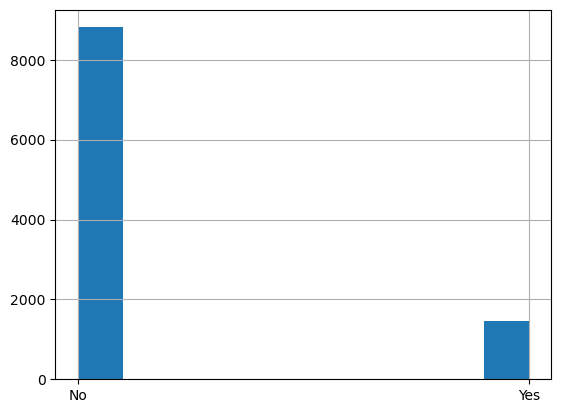

In [33]:
#aca muestro el plot de las respuestas
#total number of responses
df1['Response'].hist()
plt.show()

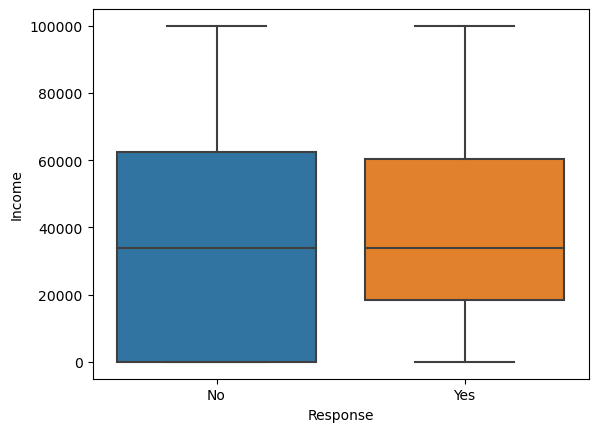

In [34]:
#response rate by income
sns.boxplot(x = 'Response',y='Income', data=df1)
plt.show()

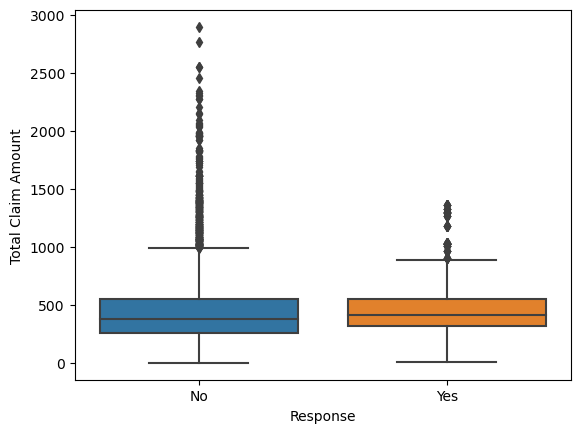

In [36]:
#response rate by total claim amount
sns.boxplot(x = 'Response',y='Total Claim Amount', data=df1)
plt.show()

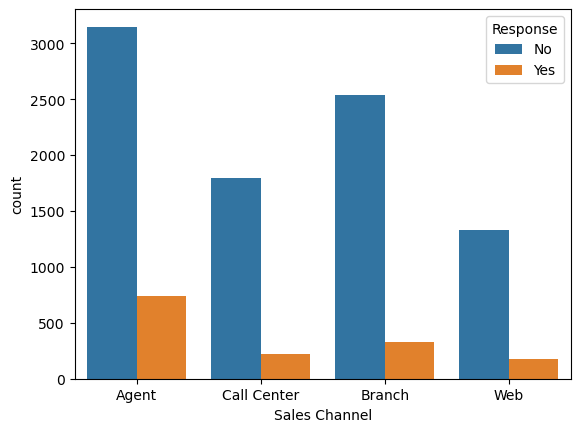

In [37]:
#response rate by sales channel 
sns.countplot(x="Sales Channel", hue="Response", data=df1)
plt.show()

# LAB4 EJERCICIOS

In [38]:
#crear df numerical y df categorical

categorical = df1.select_dtypes(include=np.object)
numerical = df1.select_dtypes(include=np.number)

/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_3363/523689398.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df1.select_dtypes(include=np.object)


In [47]:
categorical.head()

,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


In [46]:
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,1


In [48]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        10910 non-null  float64
 1   Income                         10910 non-null  int64  
 2   Monthly Premium Auto           10910 non-null  int64  
 3   Months Since Last Claim        10277 non-null  float64
 4   Months Since Policy Inception  10910 non-null  int64  
 5   Number of Open Complaints      10277 non-null  float64
 6   Number of Policies             10910 non-null  int64  
 7   Total Claim Amount             10910 non-null  float64
 8   Month                          10910 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 767.2 KB


In [49]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              10279 non-null  object
 1   Response           10279 non-null  object
 2   Coverage           10910 non-null  object
 3   Education          10910 non-null  object
 4   Employment Status  10910 non-null  object
 5   Gender             10910 non-null  object
 6   Location Code      10910 non-null  object
 7   Marital Status     10910 non-null  object
 8   Policy Type        10910 non-null  object
 9   Policy             10910 non-null  object
 10  Renew Offer Type   10910 non-null  object
 11  Sales Channel      10910 non-null  object
 12  Vehicle Class      10288 non-null  object
 13  Vehicle Size       10288 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB


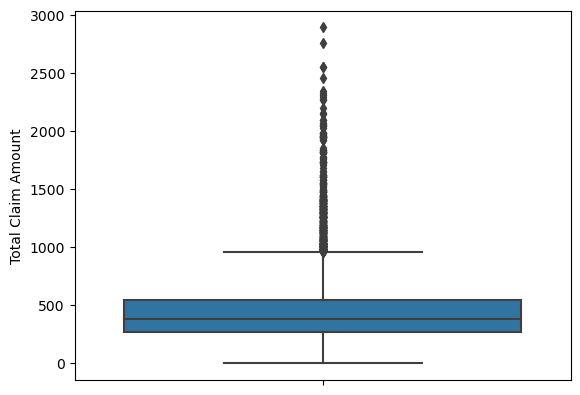

In [50]:
#usar seaborn para chequear las numericas
sns.boxplot(y="Total Claim Amount", data=numerical)
plt.show()

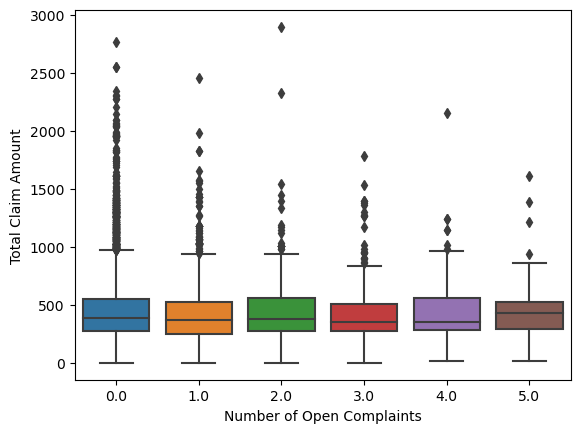

In [51]:
sns.boxplot(x ='Number of Open Complaints',y='Total Claim Amount', data=numerical)
plt.show()

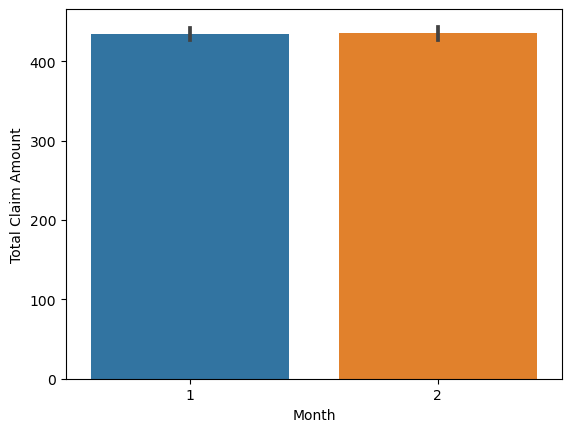

In [52]:
sns.barplot(x="Month", y="Total Claim Amount", data=numerical)
plt.show()

/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_3363/1316911161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['Total Claim Amount'])


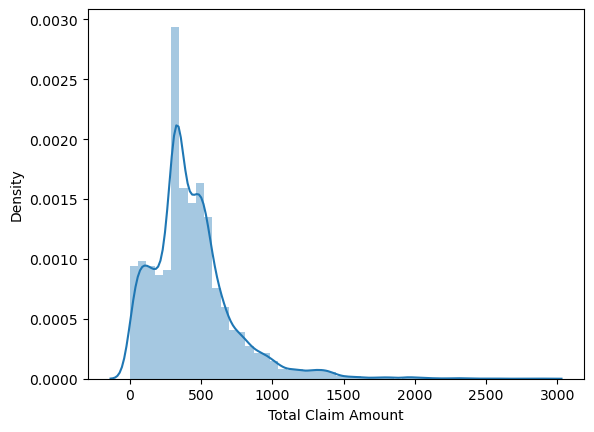

In [53]:
sns.distplot(numerical['Total Claim Amount'])
plt.show()

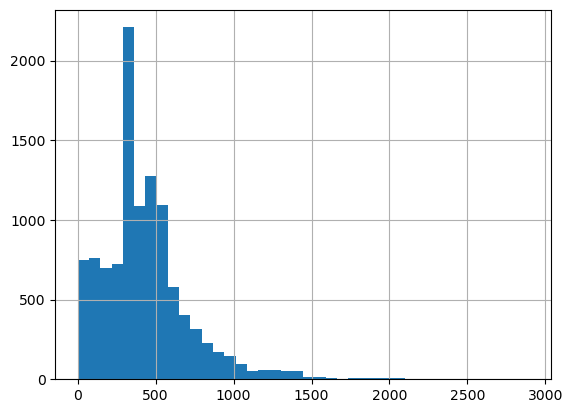

In [54]:
numerical['Total Claim Amount'].hist(bins=40)
plt.show()

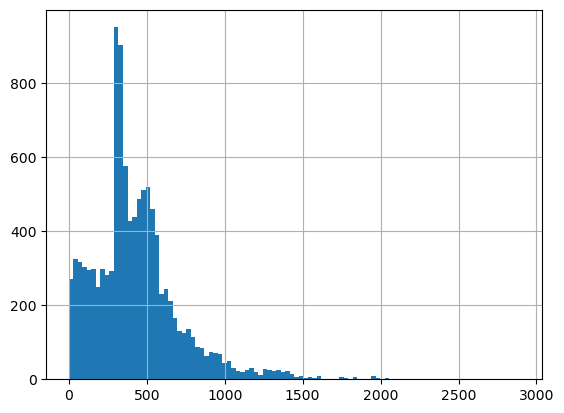

In [55]:
numerical['Total Claim Amount'].hist(bins=100)
plt.show()

In [56]:
#Do the distributions for different numerical variables look like a normal distribution? No

In [57]:
#Aca miro la multicolinealidad
#creo el subset corr_data

corr_data = numerical
correlations_matrix = corr_data.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
Customer Lifetime Value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626,-0.009234
Income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141,-0.000443
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799,0.007253
Months Since Last Claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137,-0.019951
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095,0.015163
Number of Open Complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379,-0.004813
Number of Policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923,0.005127
Total Claim Amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000,0.001425
Month,-0.009234,-0.000443,0.007253,-0.019951,0.015163,-0.004813,0.005127,0.001425,1.000000


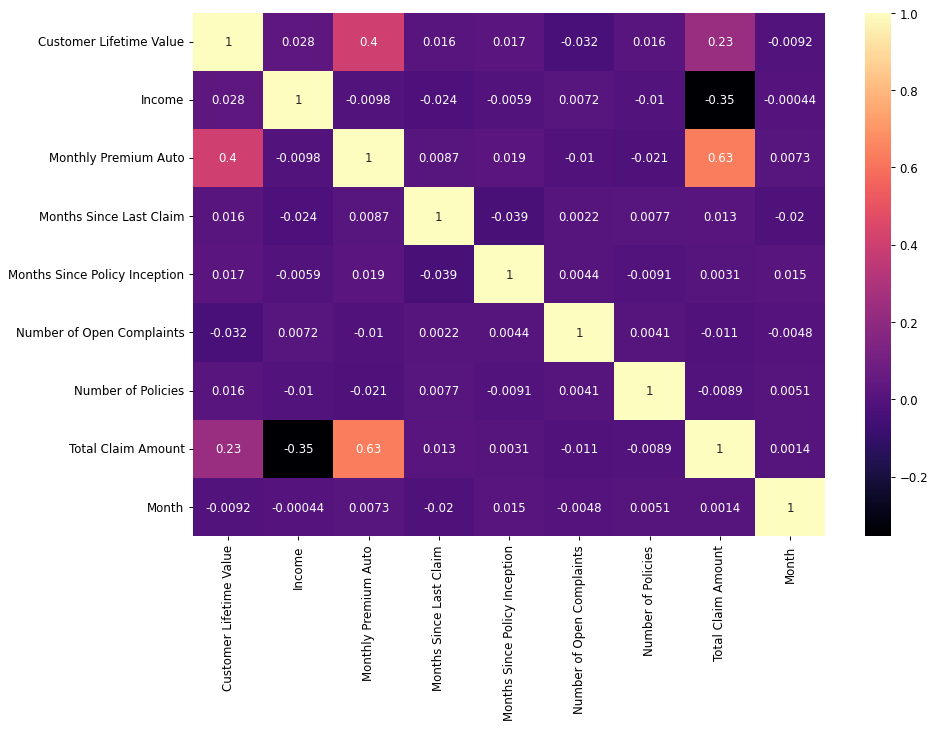

In [60]:
plt.figure(figsize= (12,8), dpi= 85)

sns.heatmap(correlations_matrix, annot=True, cmap= 'magma');
plt.show()

In [61]:
#no dropeo porque la correlacion no es mayor a 0,9

# LAB5 EJERCICIOS

In [62]:
numerical.isnull().sum()

Customer Lifetime Value            0
Income                             0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Total Claim Amount                 0
Month                              0
dtype: int64

In [63]:
categorical.isnull().sum()

State                631
Response             631
Coverage               0
Education              0
Employment Status      0
Gender                 0
Location Code          0
Marital Status         0
Policy Type            0
Policy                 0
Renew Offer Type       0
Sales Channel          0
Vehicle Class        622
Vehicle Size         622
dtype: int64

In [66]:
#llenar los NaN de numerical con la media

numerical['Months Since Last Claim'].fillna(numerical['Months Since Last Claim'].mean(), inplace=True)
numerical['Number of Open Complaints'].fillna(numerical['Number of Open Complaints'].mean(), inplace=True)

numerical.tail()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2
10909,6857.519928,0,101,31.000000,1,0.000000,3,1021.719397,1


In [68]:
#normalize numerical df
MinMaxtransformer = MinMaxScaler().fit(numerical)
x_norm = MinMaxtransformer.transform(numerical)
x_norm.shape
x_norm = pd.DataFrame(x_norm,columns=numerical.columns)
x_norm.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.101171,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.257445,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.165875,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.167263,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.244657,0.0


In [69]:
#asi se hace el split entre x e y
Y=numerical['Total Claim Amount']
X=numerical.drop(['Total Claim Amount'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1479.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:54:59   Log-Likelihood:                -73410.
No. Observations:               10910   AIC:                         1.468e+05
Df Residuals:                   10901   BIC:                         1.469e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# LAB6 EJERCICIOS

In [70]:
categorical.isnull().sum()

State                631
Response             631
Coverage               0
Education              0
Employment Status      0
Gender                 0
Location Code          0
Marital Status         0
Policy Type            0
Policy                 0
Renew Offer Type       0
Sales Channel          0
Vehicle Class        622
Vehicle Size         622
dtype: int64

In [75]:
#drop NaN values from categorical DF

clean_categorical = categorical.dropna()
clean_categorical

,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


In [74]:
clean_categorical.isnull().sum()

State                0
Response             0
Coverage             0
Education            0
Employment Status    0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

In [78]:
#create dummies for clean_categorical subset 'cat_encoded'
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(clean_categorical)
encoded = encoder.transform(clean_categorical).toarray()
feature_names = encoder.get_feature_names_out(clean_categorical.columns)
cat_encoded = pd.DataFrame(encoded, columns=feature_names)

In [79]:
cat_encoded

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9684,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9685,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9686,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [80]:
#concatenate the dataframes cat_encoded and x_norm
dfconcat = pd.concat([cat_encoded, x_norm], axis=1)

In [81]:
dfconcat

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.101171,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.257445,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.165875,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.167263,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.244657,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.167823,0.000000,0.810127,0.432831,0.404040,0.076851,0.750,0.419717,0.0
10906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.094333,0.0
10907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,0.131763,1.0
10908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.123717,0.642072,0.409283,0.000000,0.272727,0.800000,0.625,0.213674,1.0


In [84]:
dfconcat.isnull().sum()

State_California                   1222
State_Nevada                       1222
State_Oregon                       1222
State_Washington                   1222
Response_Yes                       1222
Coverage_Extended                  1222
Coverage_Premium                   1222
Education_College                  1222
Education_Doctor                   1222
Education_High School or Below     1222
Education_Master                   1222
Employment Status_Employed         1222
Employment Status_Medical Leave    1222
Employment Status_Retired          1222
Employment Status_Unemployed       1222
Gender_M                           1222
Location Code_Suburban             1222
Location Code_Urban                1222
Marital Status_Married             1222
Marital Status_Single              1222
Policy Type_Personal Auto          1222
Policy Type_Special Auto           1222
Policy_Corporate L2                1222
Policy_Corporate L3                1222
Policy_Personal L1                 1222


In [85]:
clean_concat = dfconcat.dropna()
clean_concat

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.101171,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.257445,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.165875,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.167263,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.244657,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.056612,0.000000,0.151899,0.114286,0.111111,0.000000,0.375,0.298333,0.0
9684,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.274609,0.000000,0.118143,1.000000,0.222222,0.000000,0.125,0.186161,0.0
9685,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.160227,0.000000,0.029536,0.314286,0.525253,0.000000,0.125,0.112784,1.0
9686,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.007649,0.393845,0.012658,0.200000,0.535354,0.000000,0.000,0.106148,1.0


In [90]:
Y=clean_concat['Total Claim Amount']
X=clean_concat.drop(['Total Claim Amount'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     220.9
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:35:41   Log-Likelihood:                 12114.
No. Observations:                9688   AIC:                        -2.413e+04
Df Residuals:                    9638   BIC:                        -2.377e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [91]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
r2_score(y_test, predictions)

0.5480643085272461

In [92]:
mse=mean_squared_error(y_test, predictions) 
print(mse)

0.004669719085326731


In [93]:
rmse = math.sqrt(mse)
print(rmse)

0.06833534287121658


In [94]:
r2 = r2_score(y_test, predictions)
r2

0.5480643085272461